<a href="https://colab.research.google.com/github/Childish1jin/Deep-Learning-with-TensorFlow/blob/master/%E2%80%9CThe_simplest_fashion_mnist_%2B_Confusion_Matrix_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

# tf.enable_eager_execution()

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images_norm = train_images/256
test_images_norm = test_images/256

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [0]:
model.fit(train_images_norm, train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4960 - accuracy: 0.8254
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3741 - accuracy: 0.8647
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3363 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3145 - accuracy: 0.8838
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2950 - accuracy: 0.8915


In [0]:
loss, accuracy = model.evaluate(test_images_norm, test_labels)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3461 - accuracy: 0.8747
Test loss: 0.34606102108955383
Test accuracy: 0.8747000098228455


Image ID 4636 - 5


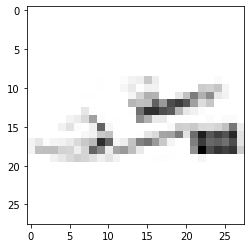

In [0]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

image_id = np.random.randint(len(test_images))
print("Image ID {} - {}".format(image_id, test_labels[image_id]))
plt.imshow(test_images[image_id], cmap='Greys')

In [0]:
image_data = (test_images[image_id]/256)
model.predict(image_data.reshape(1, 28, 28))

array([[1.8951365e-04, 1.1388497e-05, 3.2250796e-04, 4.4492455e-05,
        3.7015553e-04, 9.8600292e-01, 1.0217351e-03, 1.0735385e-02,
        1.3338811e-04, 1.1684671e-03]], dtype=float32)

In [0]:
np.argmax(model.predict(image_data.reshape(1, 28, 28)))

5

In [0]:
model.save('fashion-mnist.hd5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: fashion-mnist.hd5/assets


In [0]:
from google.colab import files

files.download('fashion-mnist.hd5')

MessageError: ignored

In [0]:
!ls -laF

total 20
drwxr-xr-x 1 root root 4096 Jun 10 07:47 ./
drwxr-xr-x 1 root root 4096 Jun 10 07:43 ../
drwxr-xr-x 1 root root 4096 Jun  8 16:15 .config/
drwxr-xr-x 4 root root 4096 Jun 10 07:47 fashion-mnist.hd5/
drwxr-xr-x 1 root root 4096 May 29 18:19 sample_data/


In [0]:
from tensorflow.keras.models import load_model

newmodel = load_model('fashion-mnist.hd5')

In [0]:
newmodel.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


image_id = np.random.randint(len(test_images))
print("Image ID {} - target class {}".format(image_id, test_labels[image_id]))
plt.imshow(test_images[image_id], cmap='Greys')

image_data = (test_images[image_id]/256)
print(model.predict(image_data.reshape(1, 28, 28)))

print("\n\nPredicted - {}".format(np.argmax(model.predict(image_data.reshape(1, 28, 28)))))

AttributeError: ignored

# Confusion matrix

In [0]:
?tf.confusion_matrix

Object `tf.confusion_matrix` not found.


In [0]:
np.argmax(model.predict(test_images_norm), axis=1)

array([9, 2, 1, ..., 8, 1, 5])

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
confusion_matrix(test_labels, np.argmax(model.predict(test_images_norm), axis=1))

array([[774,   1,  27,  21,   4,   1, 165,   0,   7,   0],
       [  2, 970,   1,  19,   4,   0,   3,   0,   1,   0],
       [  9,   0, 735,  13, 155,   0,  86,   0,   2,   0],
       [ 20,  10,  10, 887,  36,   0,  33,   0,   4,   0],
       [  0,   0,  60,  30, 842,   0,  68,   0,   0,   0],
       [  0,   0,   0,   0,   0, 966,   0,  33,   1,   0],
       [ 84,   1,  74,  31,  74,   0, 727,   0,   9,   0],
       [  0,   0,   0,   0,   0,  13,   0, 978,   0,   9],
       [  4,   1,   3,   4,   6,   4,   3,   7, 968,   0],
       [  0,   0,   0,   0,   0,  15,   1,  84,   0, 900]])

In [0]:
cm = confusion_matrix(test_labels, np.argmax(model.predict(test_images_norm), axis=1))

In [0]:
import seaborn as sns; sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

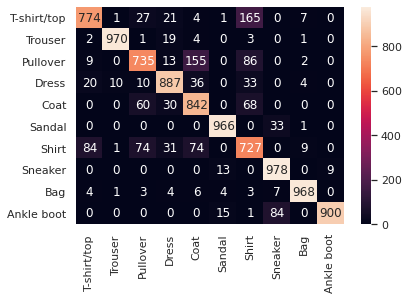

In [0]:
confusion_matrix = sns.heatmap(cm, annot=True, fmt="d", yticklabels=fashion_mnist_labels, xticklabels=fashion_mnist_labels)
confusion_matrix.set_xticklabels(confusion_matrix.get_xticklabels(), rotation = 90)

confusion_matrix